In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pcapanalysis-31/TG_60_EWMA_5_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-Capture-44-1_V2.csv
/kaggle/input/pcapanalysis-31/TG_60_EWMA_5_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-Capture-20-1_V2.csv
/kaggle/input/pcapanalysis-31/TG_60_EWMA_5_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Honeypot-Capture-5-1_V2Adjust.csv
/kaggle/input/pcapanalysis-31/TG_60_EWMA_5_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-Capture-3-1_V2Adjust.csv
/kaggle/input/pcapanalysis-31/TG_60_EWMA_5_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-Capture-42-1_V2Adjust.csv
/kaggle/input/pcapanalysis-31/TG_60_EWMA_5_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-Capture-3-1_V2.csv
/kaggle/input/pcapanalysis-31/TG_60_EWMA_5_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-Capture-1-1_V2.csv
/kaggle/input/pcapanalysis-31/TG_60_EWMA_5_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-Capture-1-1_V2Adjust.csv
/kaggle/input/pcapanalysis-31/TG_60_EWMA_5_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-C

The files for processing are set up in a variable sld below and the corresponding ip address to be targetted in each file are stored in a variable IP
The penultimate block of code in this notebook specifies the files to be processed - it can be one or more files to iterate through for pre-processing and analysis and to produce the graphs. The resulting charts and tables from the analysis are stored in the output folder and can be downloaded as images.

In [8]:
sld=["CTU-IoT-Malware-Capture-34-1", #0
         "CTU-IoT-Malware-Capture-43-1", #1
         "CTU-IoT-Malware-Capture-44-1", #2
         "CTU-IoT-Malware-Capture-49-1", #3
         "CTU-IoT-Malware-Capture-52-1", #4
         "CTU-IoT-Malware-Capture-20-1", #5
         "CTU-IoT-Malware-Capture-21-1", #6
         "CTU-IoT-Malware-Capture-42-1", #7
         "CTU-IoT-Malware-Capture-60-1", #8
         "CTU-IoT-Malware-Capture-17-1", #9
         "CTU-IoT-Malware-Capture-36-1", #10
         "CTU-IoT-Malware-Capture-33-1", #11
         "CTU-IoT-Malware-Capture-8-1",  #12
         "CTU-IoT-Malware-Capture-35-1", #13
         "CTU-IoT-Malware-Capture-48-1", #14
         "CTU-IoT-Malware-Capture-39-1", #15
         "CTU-IoT-Malware-Capture-7-1",  #16
         "CTU-IoT-Malware-Capture-9-1",  #17
         "CTU-IoT-Malware-Capture-3-1",  #18
         "CTU-IoT-Malware-Capture-1-1",  #19
         "CTU-IoT-Honeypot-Capture-4-1",  #20
         "CTU-IoT-Honeypot-Capture-5-1"]  #21

IP=["192.168.1.195", "192.168.1.198", "192.168.1.199", "192.168.1.193","192.168.1.197", "192.168.100.103","192.168.100.113","192.168.1.197","192.168.1.195","192.168.100.111",
"192.168.1.198","192.168.1.197" , "192.168.100.113" ,"192.168.1.195","192.168.1.200","192.168.1.194","192.168.100.108","192.168.100.111","192.168.2.5","192.168.100.103","192.168.1.132",'192.168.2.3']
FileNumber=['95','94','1','3','9','7','39','48','35','8','33','36','17','60','42','21','20','52','49','44','43','34']

try:
    del ipaddr
except:
    print('')
ipaddr={}
x=0
for i in IP:
    print(FileNumber[x]," ",IP[len(IP)-x-1])
    #print(x," ",len(IP)-x-1,IP[x])
    ipaddr[FileNumber[x]]=IP[len(IP)-x-1]
    #ipaddr[FileNumber[x]]=IP[x]
    x=x+1 
print(ipaddr)

95   192.168.2.3
94   192.168.1.132
1   192.168.100.103
3   192.168.2.5
9   192.168.100.111
7   192.168.100.108
39   192.168.1.194
48   192.168.1.200
35   192.168.1.195
8   192.168.100.113
33   192.168.1.197
36   192.168.1.198
17   192.168.100.111
60   192.168.1.195
42   192.168.1.197
21   192.168.100.113
20   192.168.100.103
52   192.168.1.197
49   192.168.1.193
44   192.168.1.199
43   192.168.1.198
34   192.168.1.195
{'95': '192.168.2.3', '94': '192.168.1.132', '1': '192.168.100.103', '3': '192.168.2.5', '9': '192.168.100.111', '7': '192.168.100.108', '39': '192.168.1.194', '48': '192.168.1.200', '35': '192.168.1.195', '8': '192.168.100.113', '33': '192.168.1.197', '36': '192.168.1.198', '17': '192.168.100.111', '60': '192.168.1.195', '42': '192.168.1.197', '21': '192.168.100.113', '20': '192.168.100.103', '52': '192.168.1.197', '49': '192.168.1.193', '44': '192.168.1.199', '43': '192.168.1.198', '34': '192.168.1.195'}


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pylab import rcParams
import scipy
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#rcParams("figure.figsize")=5, 4
sns.set_style("whitegrid")

Dataframe df1 is the dataframe used to hold the control data i.e. the benchmark files produced by the IoT23 experiment
Dataframe df2 is the dataframe used to hold the files produced by the algorithm. Once the data is loaded into the dataframes they are pre-processed to enable the analysis

In [10]:
def runmain(ftpno):
    iotfile=ftpno+"-1"
    AdjustFlag=""
    TG="60"
    EWMA="5"
    Lvalue=""
    iotfilepng=iotfile+AdjustFlag
    if int(ftpno)>90:
        qualifier="Honeypot"
        qualifier2="Honeypot"
        ftpnox=ftpno[1:]
    else:
        qualifier="Malware"
        qualifier2="IoT-Malware"
        ftpnox=ftpno 
    iot23_path_df1="/kaggle/input/trimmed-ctuiotmalwarecapture31/"
    iot23_file_df1="trimmed_CTU-"+qualifier2+"-Capture-"+ftpnox+"-1.csv"
    iot23_path_df2="/kaggle/input/pcapanalysis-31/"
    iot23_file_df2="TG_"+TG+"_EWMA_"+EWMA+"_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-"+qualifier+"-Capture-"+ftpnox+"-1_V2"+Lvalue+AdjustFlag+".csv"
    
    
    hdrblk="ts	uid	id.orig_h	id.orig_p	id.resp_h	id.resp_p	proto	service	duration	orig_bytes	resp_bytes	conn_state	local_orig	local_resp	missed_bytes	history	orig_pkts	orig_ip_bytes	resp_pkts	resp_ip_bytes	tunnel_parents   label   detailed-label"
    hdr=hdrblk.split("	")
    print(iotfile)
    print("  loading df1")
    def load_iot23_data(iot23_path,iot23_file):
        csv_path = os.path.join(iot23_path, iot23_file)
        return pd.read_csv(csv_path,sep='\t', names=hdr)    
    df1=load_iot23_data(iot23_path_df1,iot23_file_df1)
     
    df1 = df1.drop(df1[df1['id.orig_h'] != ipaddr[ftpno]].index)
   
    print("  loading df2")
    def load_iot23_data(iot23_path,iot23_file):
        csv_path = os.path.join(iot23_path, iot23_file)
        return pd.read_csv(csv_path,sep=',')

    df2=load_iot23_data(iot23_path_df2,iot23_file_df2)

    print("  Prepping df1")
   
    
    df1.rename(columns={'tunnel_parents   label   detailed-label':'label'}, inplace=True)
    df1.loc[df1['label'].str.contains('enign'), 'malware'] = 'benign'
    df1.loc[~df1['label'].str.contains('enign'), 'malware'] = 'malware'
    df1.loc[df1['label'].str.contains('enign'), 'ANOMALY'] = 0
    df1.loc[~df1['label'].str.contains('enign'), 'ANOMALY'] = 1

    values_dict = {'benign': 1, 'Attack': 2, 'PartOfAHorizontalPortScan': 3, 'Okiru': 4, 'C&C-HeartBeat': 5, 'C&C': 6, 'DDoS': 7}

    df1['malware_type'] = df1['label'].str.split('   ').str[2].map(values_dict)
    df1.loc[df1['label'].str.contains('enign'), 'malware_type'] = 0
    df1['Datetime'] = pd.to_datetime(df1['ts'],unit='s')
    df2['DateTime'] = pd.to_datetime(df2['DateTime'], errors='coerce')

    df2 = df2.dropna(subset=['DateTime'])
    df2.ANOMALY=df2.ANOMALY.astype(float)
    
    print("  Calculating values")
     
   
    
    
    df1Start=df1['Datetime'].iloc[0]
    df1End=df1['Datetime'].iloc[-1]
    df1Anom=df1.loc[df1['ANOMALY'] == 1]
    try :
        df1LblDetect=df1Anom['Datetime'].iloc[0]
    except:
        df1LblDetect=0
    df1AnomTot=df1Anom.ANOMALY.sum()
    df1PacketsTot= df1Anom.orig_pkts.sum()

    df2Start=df2['DateTime'].iloc[0]
    df2End=df2['DateTime'].iloc[-1]
    df2Anom=df2.loc[df2['ANOMALY'] == 1]
    df2LblDetect=df2Anom['DateTime'].iloc[0]
    df2Timegroup=df2Anom['Timegroup'].iloc[0]
    df2CountTot= df2Anom.ActualCount.sum()
    df2AnomTot= df2Anom.ANOMALY.sum()
    print(df2AnomTot)
    print(df2CountTot)
    #df2CountAnom=df2AnomTot*df2CountTot
    if df1LblDetect==0:
        diff="NA"
    else:
        diff=max(df1LblDetect-df2LblDetect,df2LblDetect-df1LblDetect)
    
    #calculate sketch error mean
    df2['Sketcherror']=(df2['ActualCount']-df2['Count'])/df2['ActualCount']
    df2sketcherror=df2['Sketcherror'].mean()
    df2sketcherrormax=df2['Sketcherror'].max()
    
    line=iotfile+","+str(df1Start)+","+str(df1End)+","+str(df1LblDetect)+","+str(df2LblDetect)+","+str(df2Timegroup)+","+str(diff)+","+str(df1AnomTot)+","+str(df2AnomTot)+","+str(df1PacketsTot)+","+str(df2CountTot)+","+str(df2sketcherror)+","+str(df2sketcherrormax)+"\n"
    print("\n",line)
    f = open("Summary.csv", "a")
    f.write(line)
    f.close()
    
    print(df1.head())
    print(df2.head())
    #ax = sns.regplot(x='orig_pkts',y='ANOMALY', y_jitter=0.2,data=df1,ci=None,line_kws={'lw':0})
    #ax.set(ylim=(0, 1.5))
    #plt.savefig(iotfilepng+" TG_"+TG+" EWMA_"+EWMA+"_scatterdf1.png")
    
    ax = sns.regplot(x='Count',y='ANOMALY', y_jitter=0.2,data=df2,ci=None,line_kws={'lw':0})
    #ax.set(xscale='log') 
    ax.set(ylim=(0, 1.5))
    ax.set(xlabel='Packet Count', ylabel='Anomaly')
    #ax.set(xlim=(0, 500))
    plottitle=iotfile+":  Packet Sizes"
    plt.suptitle(plottitle, fontsize=8)
    plt.savefig(iotfilepng+" TG_"+TG+" EWMA_"+EWMA+" L_"+Lvalue+"_scatter.png")
    plt.show()
    
    
    myFmt = mdates.DateFormatter('%d')
   
   
    df2 = df2.set_index(['DateTime'])
    df2.sort_values(by=['DateTime'], inplace=True)
   
    plottitle=iotfile+":  EWMA span = "+str(EWMA)+", time window = "+str(TG)+" L_"+Lvalue
    plottitle=iotfile 
   
  
    fig,ax1 = plt.subplots()
    plt.plot(df2.index,df2.Count,df2.UCL)
    monthyearFmt = mdates.DateFormatter('%H:%Shrs %d-%m-%y')
    ax1.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
    ax1.xaxis.set_major_locator(MaxNLocator(6)) 

    plt.suptitle(plottitle, fontsize=8)
    plt.legend(labels=["Actual Count","UCL"])
    plt.savefig(iotfilepng+" TG_"+TG+" EWMA_"+EWMA+" L_"+Lvalue+"_plot.png",bbox_inches="tight")
    plt.show()
    
    
    
    #df2['UK Date'] = pd.to_datetime(df2['DateTime'], format='%d/%m/%Y')
    df1 = df1.set_index(['Datetime'])
    df1.sort_values(by=['Datetime'], inplace=True)
    plottitle=iotfile+" Labelled DS "+str(TG)+" L_"+Lvalue
    plottitle=ftpnox+"-1 Labelled DS"
    
    fig,ax2 = plt.subplots()
    plt.plot(df1.index,df1.ANOMALY)
    monthyearFmt = mdates.DateFormatter('%H:%Shrs %d %B %Y')
    ax2.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
    ax2.xaxis.set_major_locator(MaxNLocator(6)) 
    #plt.xticks(rotation=90)
    #plt.locator_params(axis="x", nbins=6)
    plt.suptitle(plottitle, fontsize=8)
    plt.legend(labels=["ANOMALY"])
    plt.savefig(iotfilepng+" TG_"+TG+" EWMA_"+EWMA +"_plotDF1.png",bbox_inches="tight")
    plt.show()
    
    
    plottitle=ftpnox+"-1 Algorithm Anomaly Detection"
    fig,ax3 = plt.subplots()
    plt.plot(df2.index,df2.ANOMALY)
    monthyearFmt = mdates.DateFormatter('%H:%Shrs %d %B %Y')
    ax3.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
    ax3.xaxis.set_major_locator(MaxNLocator(6)) 
    #plt.xticks(rotation=90)
    #plt.locator_params(axis="x", nbins=6)
    plt.suptitle(plottitle, fontsize=8)
    plt.legend(labels=["ANOMALY"])
    plt.savefig(iotfilepng+" TG_"+TG+" EWMA_"+EWMA+"_plotDF2.png",bbox_inches="tight")
    plt.show()
     

File,Capture start,Capture End, First Detected (label),First Detected (algor),Timegroup, Difference, Total Anomalies (Label), Total Anomalies (algor),Packets (label),Count (algor),Sketch Error,Sketch Error max

94-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
97.0
887

 94-1,2018-10-25 12:08:22.538640128,2018-10-25 14:27:54.054085120,0,2018-10-25 12:07:08.574688,0,NA,0.0,97.0,0,887,0.000380517503805175,0.5

             ts                 uid      id.orig_h  id.orig_p  \
0  1.540469e+09  CGm6jB4dXK71ZDWUDh  192.168.1.132      58687   
1  1.540469e+09  CnaDAG3n5r8eiG4su2  192.168.1.132       1900   
2  1.540469e+09  CUrxU238nt0m6yTgKf  192.168.1.132      32893   
3  1.540470e+09  CGQf8t1kjdxB5PHXL4  192.168.1.132      53395   
4  1.540470e+09  CUo9DH2QDnCaBIGjkg  192.168.1.132      52801   

         id.resp_h  id.resp_p proto service    duration orig_bytes  ...  \
0     216.239.35.4        123   udp       -    0.114184         48  ...   
1  239.255.255.250       190

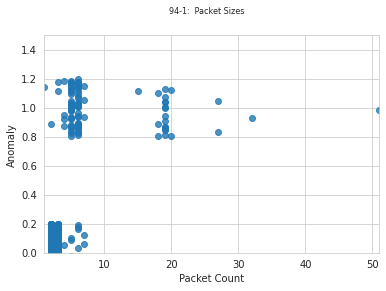

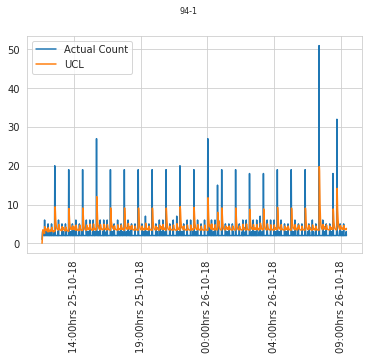

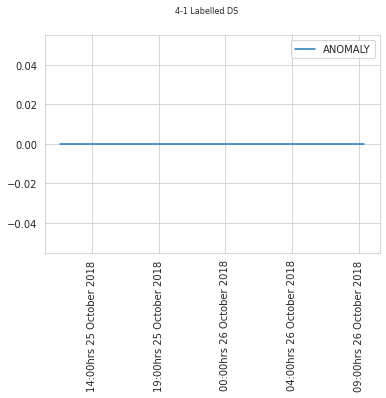

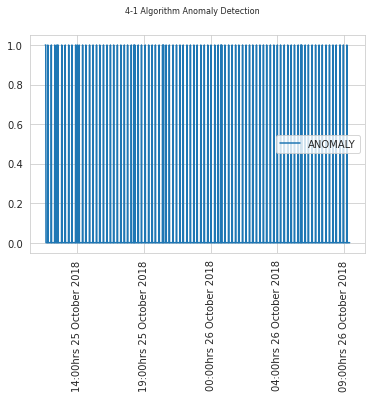

95-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
2.0
145742

 95-1,2018-09-21 09:52:29.357456896,2018-09-21 11:38:24.323699968,0,2018-09-21 09:52:58.000105,0,NA,0.0,2.0,0,145742,2.5156871964351706e-07,7.622532205198568e-05

              ts                 uid    id.orig_h  id.orig_p      id.resp_h  \
12  1.537524e+09  CrZmX42rcVaIRmylO4  192.168.2.3      43216  176.32.98.203   
13  1.537524e+09  CT9yHm4yFFcGqsSV55  192.168.2.3      40621  93.184.216.34   
14  1.537524e+09  CZIEEo18Q2lzPpCEHc  192.168.2.3      40623  93.184.216.34   
15  1.537524e+09  CpTNNy36sGjGpbFVmb  192.168.2.3      40624  93.184.216.34   
16  1.537524e+09  CCJan22xKwNonoPtH7  192.168.2.3      59744    192.168.2.1   

    id.resp_p proto service  duration orig_bytes  ...  history orig_pkts  \
12         80   tcp    http  0.356214        135  ...  ShADafF         4   
13         80   tcp       -  0.332740          0  ...    ShAFf         4   
14         80   tcp       -  0.300101          0  ...

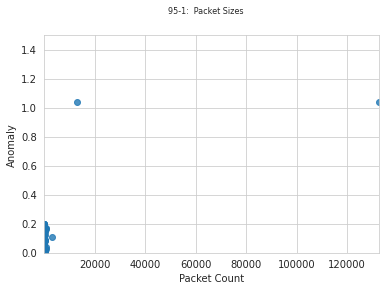

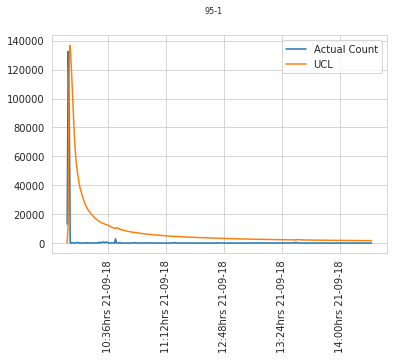

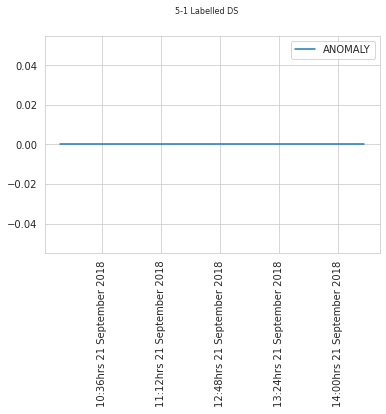

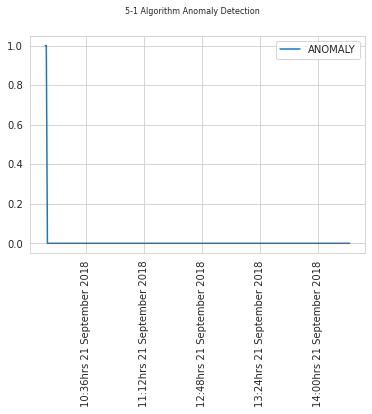

3-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
215.0
64770

 3-1,2018-05-19 18:57:41.866499840,2018-05-20 05:09:55.887376896,2018-05-19 18:57:41.866499840,2018-05-19 18:57:57.971277,0,0 days 00:00:16.104777160,151566.0,215.0,379758,64770,2.1481354184567796e-05,0.045454545454545456

             ts                 uid    id.orig_h  id.orig_p       id.resp_h  \
0  1.526756e+09  C9YvmJ3zxtuqxWxLW5  192.168.2.5      38792  200.168.87.203   
1  1.526756e+09  CGsZqZ3UiQexLzPRVb  192.168.2.5      38792  200.168.87.203   
2  1.526756e+09  C0LkBW2VEa292Nvet8  192.168.2.5      38793  200.168.87.203   
3  1.526756e+09  CMDLrn2cVhrqvW8gKa  192.168.2.5      38793  200.168.87.203   
4  1.526756e+09  C2UM8f4knuL5Vnvp3h  192.168.2.5      38794  200.168.87.203   

   id.resp_p proto service  duration orig_bytes  ... history orig_pkts  \
0      59353   tcp       -  2.998333          0  ...       S         3   
1      59353   tcp       -         -          -  ...       S         1   

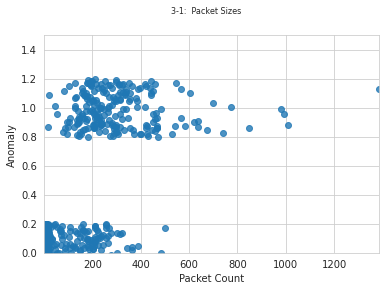

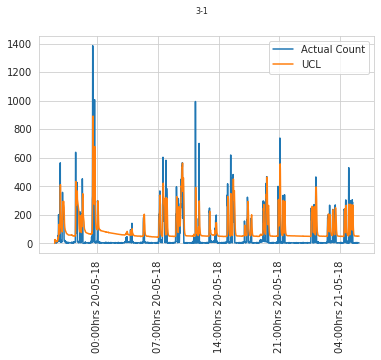

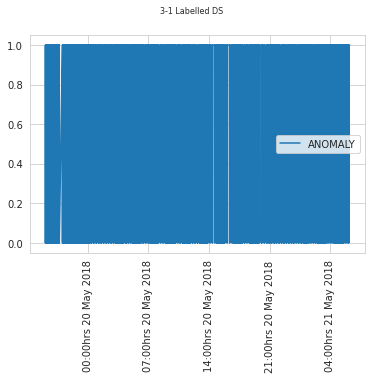

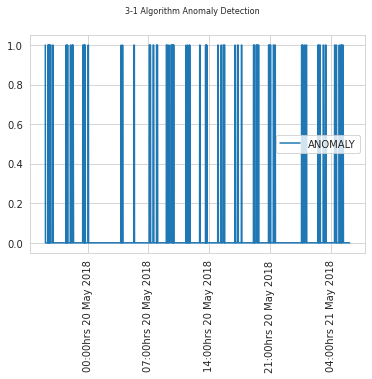

7-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
150.0
3760

 7-1,2018-07-20 15:33:06.102371072,2018-07-21 14:46:31.360862976,2018-07-20 15:41:49.281788160,2018-07-20 15:31:58.951835,0,0 days 00:09:50.329953160,11378759.0,150.0,11405813,3760,3.526093088857546e-05,0.05

             ts                 uid        id.orig_h  id.orig_p  \
0  1.532101e+09   CWeq2B3YXkMYfJ5sl  192.168.100.108       5353   
1  1.532101e+09  CYLFGG1WiaMTVZbVed  192.168.100.108      54360   
2  1.532101e+09  CXLNuE10OdgwToBIb8  192.168.100.108      53971   
3  1.532101e+09   COdAkSYAcGOu6J139  192.168.100.108      57415   
4  1.532101e+09  CrDWAb2IPhhFQIN75e  192.168.100.108      34266   

       id.resp_h  id.resp_p proto service  duration orig_bytes  ... history  \
0    224.0.0.251       5353   udp     dns  4.133830       1193  ...       D   
1  192.168.100.1         53   udp     dns  0.000997         78  ...      Dd   
2  192.168.100.1         53   udp     dns  0.054470         78  ...    

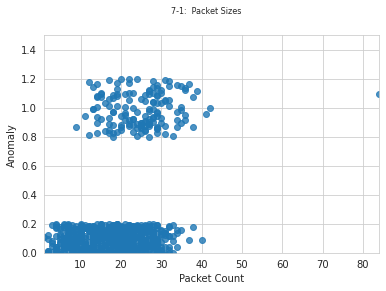

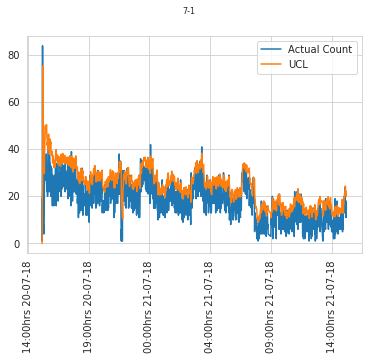

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:157: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


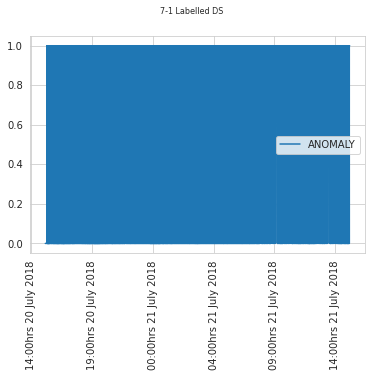

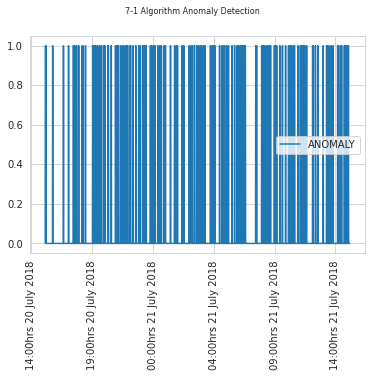

8-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
243.0
672

 8-1,2018-07-31 13:15:11.474173952,2018-08-01 13:14:13.475214848,2018-07-31 14:24:04.299948032,2018-07-31 13:15:44.478883,0,0 days 01:08:19.821065032,8222.0,243.0,12334,672,0.00024437927663734115,0.3333333333333333

             ts                 uid        id.orig_h  id.orig_p  \
0  1.533043e+09   C5JLGOoxIw2dBZt47  192.168.100.113        123   
1  1.533043e+09  Cf3cHf4jZr9nvD808i  192.168.100.113        123   
2  1.533043e+09  CJgmSt3bSY6XwE9fzc  192.168.100.113        123   
3  1.533043e+09  Cav32m4csR3OZYhShj  192.168.100.113        123   
4  1.533043e+09  ClwPfA40tU9UT4nksg  192.168.100.113        123   

        id.resp_h  id.resp_p proto service  duration orig_bytes  ... history  \
0    81.2.254.224        123   udp       -  0.005490         48  ...      Dd   
1   147.231.100.5        123   udp       -  0.001741         48  ...      Dd   
2     31.31.74.35        123   udp       -  0.004495         4

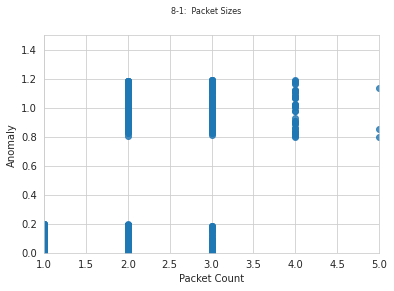

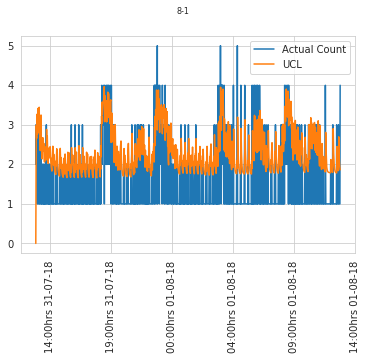

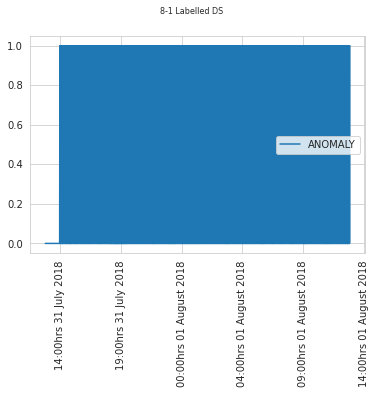

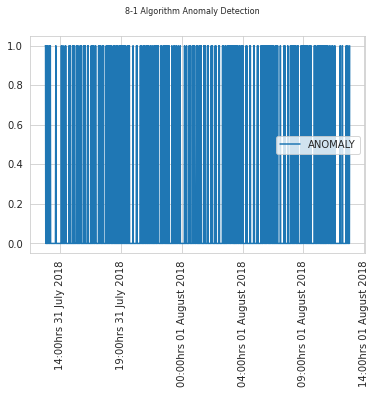

9-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
73.0
4295

 9-1,2018-07-25 09:20:51.648888064,2018-07-26 07:54:34.249972224,2018-07-25 13:28:50.659326976,2018-07-25 09:20:51.653639,0,0 days 04:07:59.005687976,6355745.0,73.0,6356245,4295,0.00020815986677768527,0.25

             ts                 uid        id.orig_h  id.orig_p  \
0  1.532510e+09   CnR6zKxrWbFw26ua7  192.168.100.111      40008   
4  1.532512e+09  C8a9xW23hF8nDgeNtj  192.168.100.111      36199   
5  1.532512e+09  COstHQ2pRfPLaMVBs7  192.168.100.111      48089   
6  1.532512e+09  C9hLCM10ThJFO30bl9  192.168.100.111      49635   
7  1.532512e+09  CfBUIS3oDR0u4PJwP3  192.168.100.111      60894   

       id.resp_h  id.resp_p proto service  duration orig_bytes  ... history  \
0  46.28.110.244        123   udp       -  0.004751         48  ...      Dd   
4  192.168.100.1         53   udp     dns         -          -  ...       D   
5  192.168.100.1         53   udp     dns         -          -  ...       

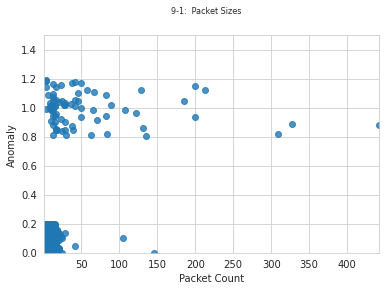

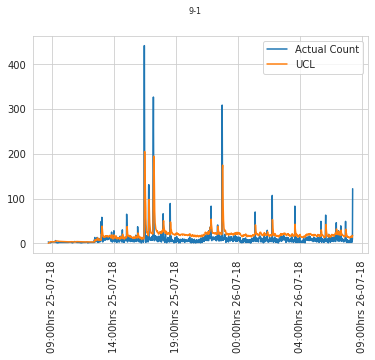

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:157: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


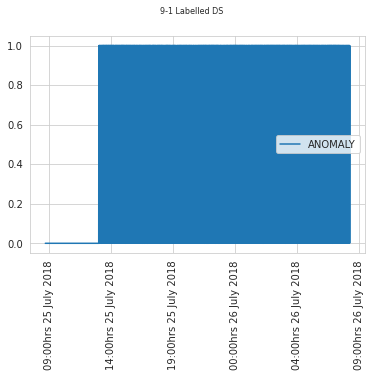

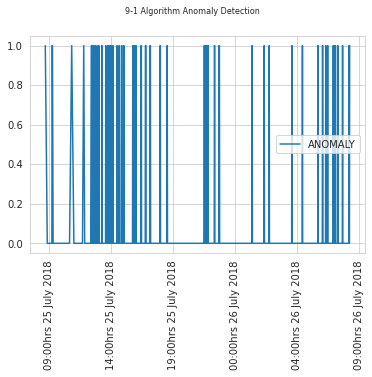

20-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
121.0
2122

 20-1,2018-10-02 11:12:49.600292864,2018-10-03 11:11:49.550106880,2018-10-02 11:18:23.951731968,2018-10-02 11:13:29.657246,0,0 days 00:04:54.294485968,16.0,121.0,17193,2122,9.927529038022436e-05,0.14285714285714285

             ts                 uid        id.orig_h  id.orig_p  \
0  1.538479e+09  CSQG794riQ4XnzTxP2  192.168.100.103      37082   
1  1.538479e+09   COTbdG2BhtGBlmf6r  192.168.100.103      34486   
2  1.538479e+09  CP48WJ2HOnLuGtr5kb  192.168.100.103      37601   
3  1.538479e+09  CeTMJi2TydRSaVdsG4  192.168.100.103      46439   
4  1.538479e+09  CZ6ne24AN9WAg9XA9d  192.168.100.103      55174   

       id.resp_h  id.resp_p proto service  duration orig_bytes  ... history  \
0  192.168.100.1         53   udp     dns  5.005151         78  ...       D   
1  192.168.100.1         53   udp     dns  0.007243         90  ...      Dd   
2  192.168.100.1         53   udp     dns  0.002250         90 

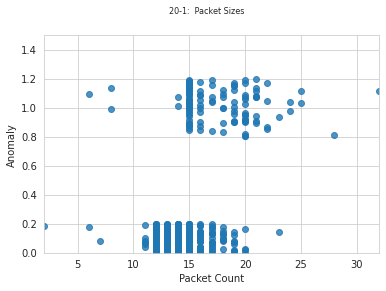

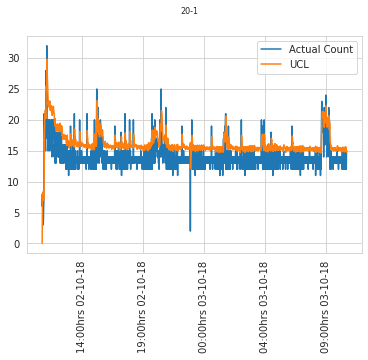

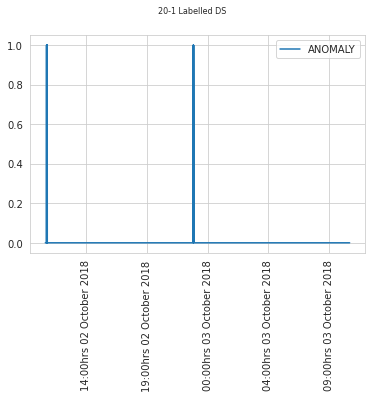

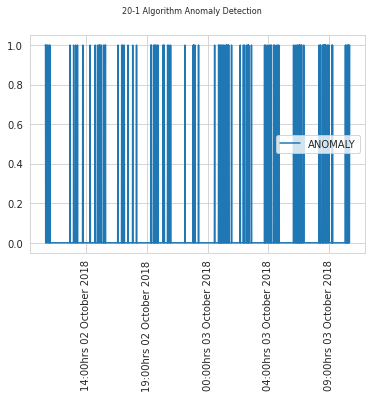

21-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
95.0
1818

 21-1,2018-10-03 13:22:33.710598912,2018-10-04 07:09:21.823246080,2018-10-03 13:25:33.455853824,2018-10-03 13:23:12.677629,0,0 days 00:02:20.778224824,14.0,95.0,17193,1818,0.00023148148148148146,0.3333333333333333

             ts                 uid        id.orig_h  id.orig_p  \
0  1.538573e+09   Cu3Tieri43IPsyBO3  192.168.100.113      42789   
1  1.538573e+09  Cbetl72NeXczaqQ8Lj  192.168.100.113      60546   
2  1.538573e+09  CUmQWl2ZA2hrbNtohe  192.168.100.113      37320   
3  1.538573e+09   C9oEZWtG35wx1Mqq5  192.168.100.113      51338   
4  1.538573e+09  CbhqpU1oZZyrP7PE6i  192.168.100.113      60088   

       id.resp_h  id.resp_p proto service  duration orig_bytes  ... history  \
0  192.168.100.1         53   udp     dns         -          -  ...       D   
1  192.168.100.1         53   udp     dns  0.001494         90  ...      Dd   
2  192.168.100.1         53   udp     dns  5.005135         78  .

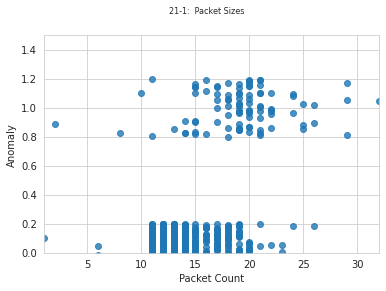

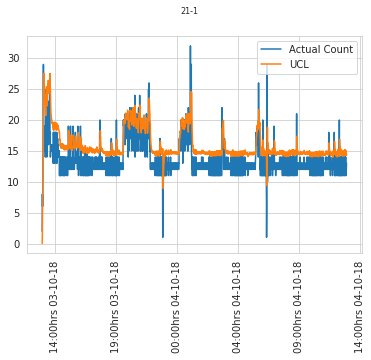

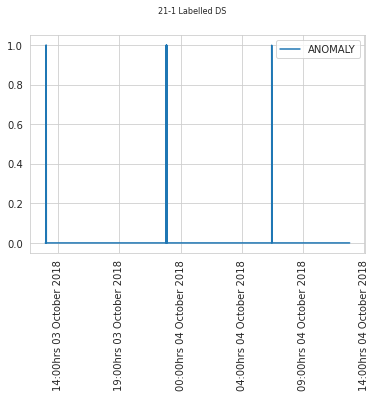

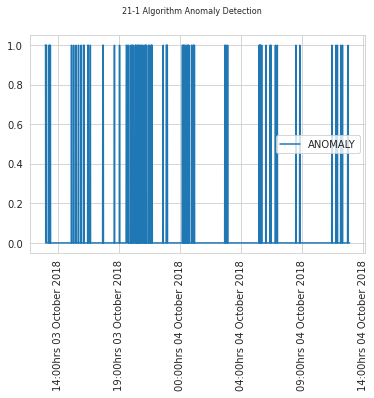

34-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
25.0
1873

 34-1,2018-12-21 14:50:16.962094080,2018-12-22 14:49:58.459568128,2018-12-21 14:55:32.353979136,2018-12-21 14:50:48.998077,0,0 days 00:04:43.355902136,21222.0,25.0,122547,1873,0.000105977108944468,0.14285714285714285

             ts                 uid      id.orig_h  id.orig_p       id.resp_h  \
0  1.545404e+09   CrDn63WjJEmrWGjqf  192.168.1.195      41040  185.244.25.235   
1  1.545404e+09  CY9lJW3gh1Eje4usP6  192.168.1.195      41040  185.244.25.235   
2  1.545404e+09   CcFXLynukEDnUlvgl  192.168.1.195      41040  185.244.25.235   
3  1.545404e+09   CDrkrSobGYxHhYfth  192.168.1.195      41040  185.244.25.235   
4  1.545404e+09  CTWZQf2oJSvq6zmPAc  192.168.1.195      41042  185.244.25.235   

   id.resp_p proto service  duration orig_bytes  ...      history orig_pkts  \
0         80   tcp       -  3.139211          0  ...            S         3   
1         80   tcp       -         -          -  ...     

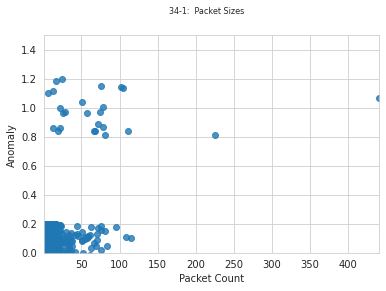

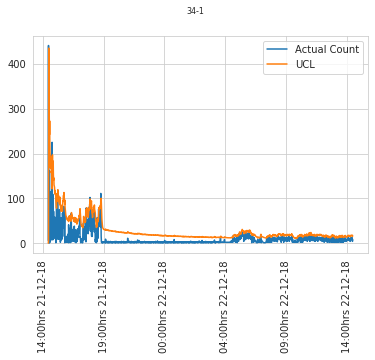

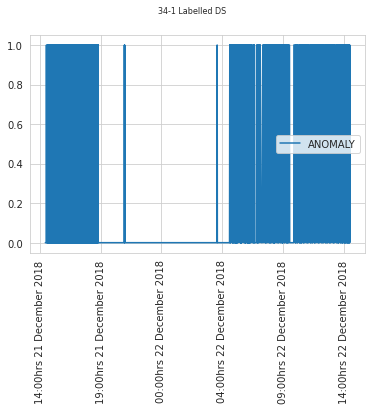

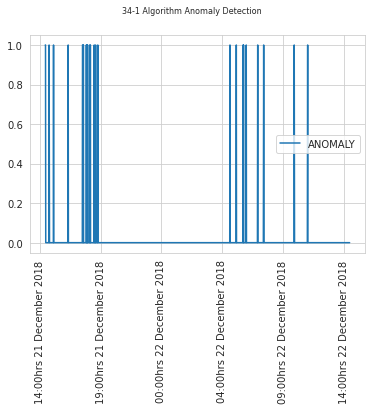

42-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
14.0
1576

 42-1,2019-01-10 13:34:48.026073856,2019-01-10 21:55:30.030004992,2019-01-10 13:34:48.026073856,2019-01-10 13:35:12.095553,0,0 days 00:00:24.069479144,6.0,14.0,324,1576,8.121959341471537e-06,0.003484320557491289

             ts                 uid      id.orig_h  id.orig_p      id.resp_h  \
0  1.547127e+09  CXY5uG2sSmjJ0grfY2  192.168.1.197      58312  104.24.96.120   
1  1.547127e+09   Ce3AJzwzXwM3Z1XBg  192.168.1.197      45082  104.24.97.120   
2  1.547127e+09  CJgnSb3XpbbOcMHKUd  192.168.1.197      58316  104.24.96.120   
3  1.547127e+09   Cq43w4aHlsW8nXZ3l  192.168.1.197      59357    192.168.1.1   
4  1.547127e+09  C5uLwl2hGy10y9PSr6  192.168.1.197      39686    192.168.1.1   

   id.resp_p proto service  duration orig_bytes  ...     history orig_pkts  \
0         80   tcp    http  3.909013         83  ...  ShADadttFf        54   
1         80   tcp    http  4.767024        150  ...  ShADadttFf      

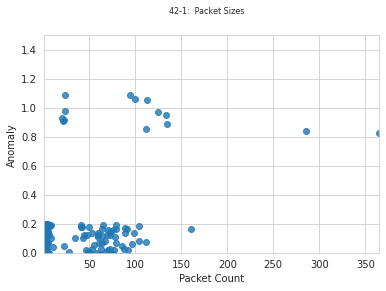

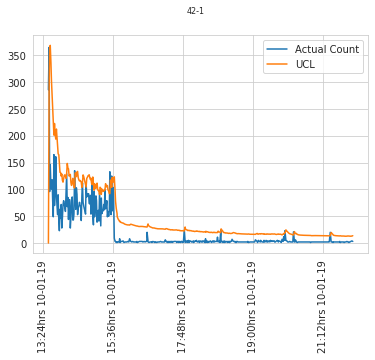

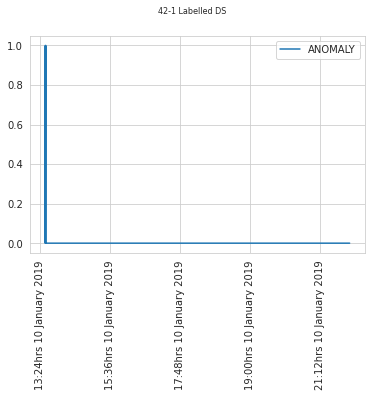

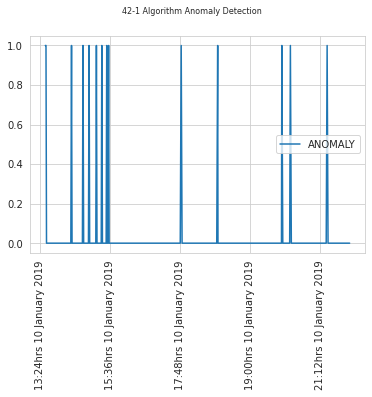

44-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
2.0
774

 44-1,2019-01-10 20:06:29.067207936,2019-01-10 22:00:53.952939008,2019-01-10 20:06:29.067207936,2019-01-10 20:07:02.033644,0,0 days 00:00:32.966436064,26.0,2.0,1306502,774,5.967299200381907e-05,0.006802721088435374

             ts                 uid      id.orig_h  id.orig_p       id.resp_h  \
0  1.547151e+09  CzsY0D4B96NTr8m7ld  192.168.1.199      59222  46.101.251.172   
1  1.547151e+09  CGEJbl3RNkmXzmkEd4  192.168.1.199      59224  46.101.251.172   
2  1.547151e+09   CVMYDw4wnZfqWrOfd  192.168.1.199      59224  46.101.251.172   
3  1.547151e+09   CXKZmpx40udvITEN2  192.168.1.199      59224  46.101.251.172   
4  1.547151e+09   CBjcNy4pOh8Xg1H4S  192.168.1.199      59224  46.101.251.172   

   id.resp_p proto service  duration orig_bytes  ...     history orig_pkts  \
0         80   tcp    http  1.686784        149  ...  ShADadttfF       122   
1         80   tcp       -  3.081233          0  ...           

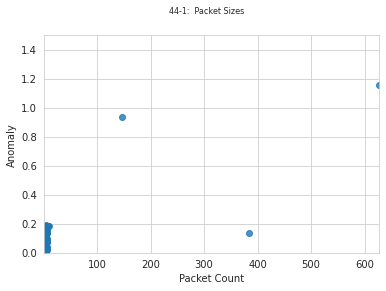

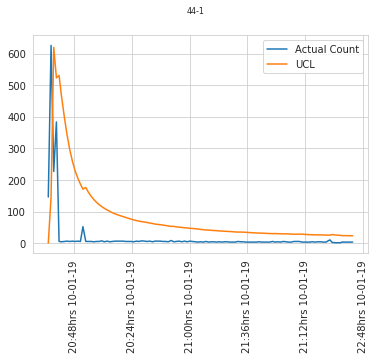

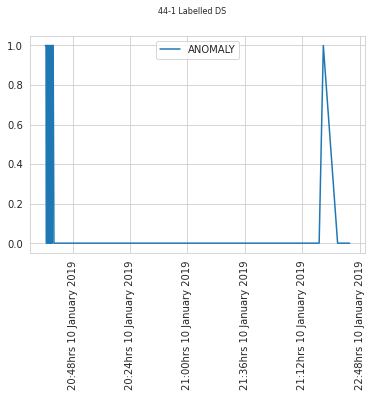

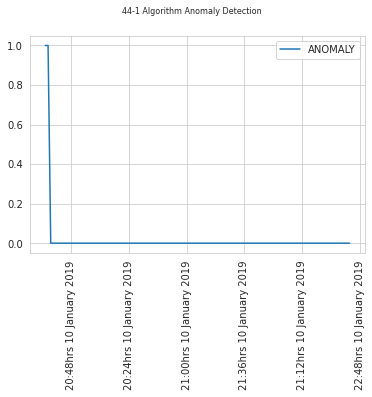

File,Capture start,Capture End, First Detected (label),First Detected (algor),Timegroup, Difference, Total Anomalies (Label), Total Anomalies (algor),Packets (label),Count (algor),Sketch Error,Sketch Error max
94-1,2018-10-25 12:08:22.538640128,2018-10-25 14:27:54.054085120,0,2018-10-25 12:07:08.574688,0,NA,0.0,97.0,0,887,0.000380517503805175,0.5
95-1,2018-09-21 09:52:29.357456896,2018-09-21 11:38:24.323699968,0,2018-09-21 09:52:58.000105,0,NA,0.0,2.0,0,145742,2.5156871964351706e-07,7.622532205198568e-05
3-1,2018-05-19 18:57:41.866499840,2018-05-20 05:09:55.887376896,2018-05-19 18:57:41.866499840,2018-05-19 18:57:57.971277,0,0 days 00:00:16.104777160,151566.0,215.0,379758,64770,2.1481354184567796e-05,0.045454545454545456
7-1,2018-07-20 15:33:06.102371072,2018-07-21 14:46:31.360862976,2018-07-20 15:41:49.281788160,2018-07-20 15:31:58.951835,0,0 days 00:09:50.329953160,11378759.0,150.0,11405813,3760,3.526093088857546e-05,0.05
8-1,2018-07-31 13:15:11.474173952,2018-08-01 13:14:13.47521484

In [11]:
Header="File,Capture start,Capture End, First Detected (label),First Detected (algor),Timegroup, Difference, Total Anomalies (Label), Total Anomalies (algor),Packets (label),Count (algor),Sketch Error,Sketch Error max\n"
print (Header)
f = open("Summary.csv", "w")
f.write(Header)
f.close()
#files="3,7,8,9,20,21,34,42,44".split(',')
files="94,95,3,7,8,9,20,21,34,42,44".split(',')
#files="9".split(',')
#files="3".split(',')
for i in files:
    runmain(i) 
#open and read the file after the appending:
f = open("Summary.csv", "r")
print(f.read())

Set Deletescratchfiles to True to clear down all the output files

In [12]:
Deletescratchfiles=False
if Deletescratchfiles :
    import glob
    # get a recursive list of file paths that matches pattern including sub directories
    fileList = glob.glob('/kaggle/working/*', recursive=True)
    fileList

    # Iterate over the list of filepaths & remove each file.
    for filePath in fileList:
        try:
            os.remove(filePath)
        except OSError:
            print("Error while deleting file")
